In [ ]:
!pip install treeinterpreter
#Successfully installed treeinterpreter-0.2.3

In [ ]:
#import necessary packages
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics.cluster import adjusted_rand_score
from matplotlib import colormaps
from matplotlib import cm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from treeinterpreter import treeinterpreter as ti
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
import warnings
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
warnings.filterwarnings('ignore')



**SHOPPER INTENTION DATA SET**

Execution time: 1.55 seconds
Random Forest Train Accuracy: 1.00
Random Forest Test Accuracy: 0.90
CrossVal Mean: 0.8967558799675588


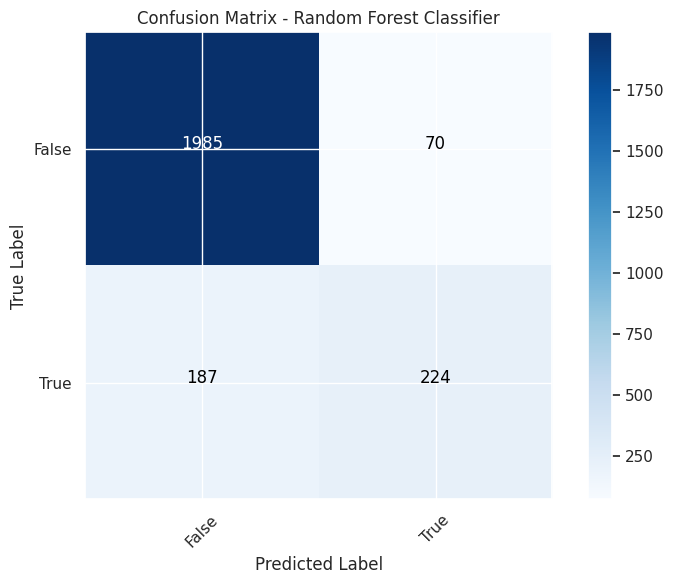

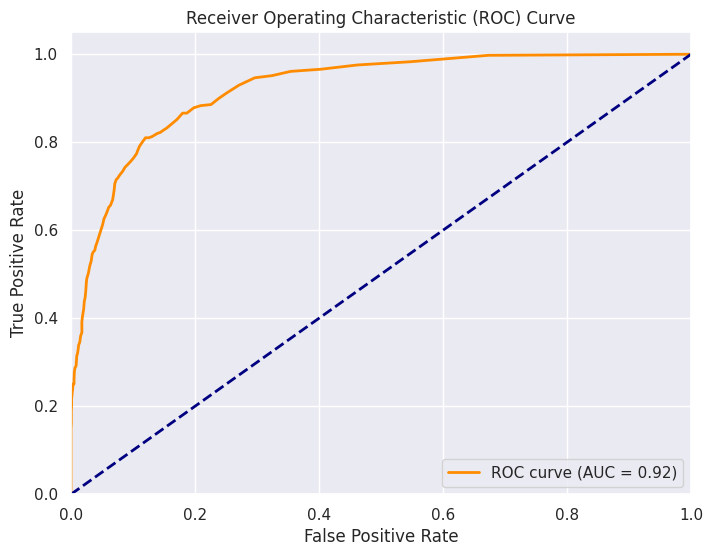

In [ ]:
# SHOPPER INTENTION - RANDOM FOREST CLASSIFICATION

# Load the dataset
data = pd.read_csv("online_shoppers_intention.csv")

# Preprocess the data
data.fillna(0, inplace=True)
label_encoder = LabelEncoder()
data['Month'] = label_encoder.fit_transform(data['Month'])
data['VisitorType'] = label_encoder.fit_transform(data['VisitorType'])
data['Weekend'] = label_encoder.fit_transform(data['Weekend'])
data['Revenue'] = label_encoder.fit_transform(data['Revenue'])
scaler = StandardScaler()
numerical_features = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                      'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues',
                      'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Split the data into training and testing sets
X = data.drop(columns=['Revenue'])
y = data['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#start time
st = time.time()

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

et = time.time()

# get the execution time
elapsed_time = et - st

# Evaluate the model
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

#cross-fold score
accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10)
print('Execution time: %.2f'% elapsed_time, 'seconds')
print("Random Forest Train Accuracy: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
print('Random Forest Test Accuracy: %.2f' % accuracy_score(y_test, y_pred))
print("CrossVal Mean:",accuracy.mean())

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_probs = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Random Forest Classifier')
plt.colorbar()
tick_marks = np.arange(len(label_encoder.classes_))
plt.xticks(tick_marks, label_encoder.classes_, rotation=45)
plt.yticks(tick_marks, label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix)):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > conf_matrix.max() / 2 else "black")
plt.tight_layout()

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(0, 0.5, 'Feature Importance')

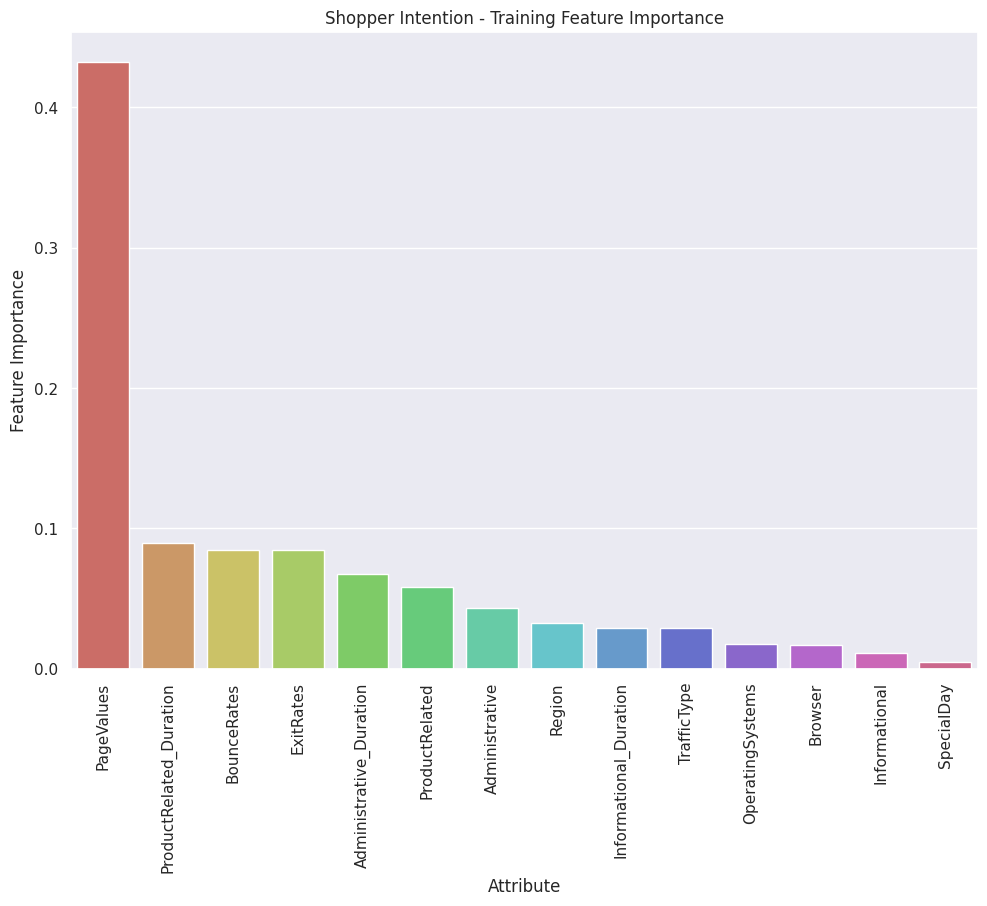

In [ ]:
#CALCULATE FEATURE IMPORTANCE FOR CLASSIFICATION INTO SUCCESSFUL OR UNSUCCESSFUL E-COMMERCE TRANSACTIONS

#import 'Online Shoppers Intention' dataset
intention_df = pd.read_csv("online_shoppers_intention.csv")

#remove non-numerical categories
intention_df = intention_df.drop(['Month','VisitorType'], axis=1)
intention_df_x=intention_df.drop(['Revenue'], axis=1)
X = intention_df_x.iloc[:,:-1].values
y = intention_df['Revenue'].values

#dataset = datasets.load_breast_cancer()
#X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(criterion='gini')

# Fit the decision tree classifier
clf = clf.fit(X_train, y_train)


# Print the feature importances
feature_importances = clf.feature_importances_


import seaborn as sns

# Sort the feature importances from greatest to least using the sorted indices
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_names = intention_df_x.columns[sorted_indices]
sorted_importances = feature_importances[sorted_indices]

# Create a bar plot of the feature importances
custom_palette = sns.hls_palette(14)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_palette(sns.color_palette("hls", 14))
#sns.barplot(x=sorted_feature_names, y=sorted_importances, palette=custom_palette)
sns.barplot(x=sorted_feature_names, y=sorted_importances, palette=custom_palette)
plt.xticks(rotation=90)
plt.title('Shopper Intention - Training Feature Importance')
plt.xlabel('Attribute')
plt.ylabel('Feature Importance')
#ax.set_xticklabels(x=sorted_feature_names, y=sorted_importances)

**SUMMER WISH E-COMMERCE DATA SET**

Insight to Active Sellers Data

In [ ]:
#import 'Online Shoppers Intention' dataset
success_df = pd.read_csv("computed_insight_success_of_active_sellers.csv")

In [ ]:
#format data for regression analysis

#drop merchant id, unnessary for regression
success_df = success_df.drop(success_df.columns[[0]], axis=1)
#success_df = success_df.drop(success_df.columns[[0]], axis=1)
#move 'totalunitssold' to the last column position position to act as the target value
cols = list(success_df.columns.values)
cols.pop(cols.index('totalunitssold'))
success_df = success_df[cols+['totalunitssold']]

#fill in any NA values with zeros
success_df = success_df.fillna(0)

Fitting time: 0.00 seconds
MSE train: 35407869.357, test:48545137.803
R^2 train: 0.817, test:0.793
The R2 score: 0.7929049147129881

The MSE: 48545137.802929595
        
Coefficients: 
                  Attribute  Coefficient
0            listedproducts  6773.040292
1   meanunitssoldperproduct     1.101287
2                    rating  1575.683942
3      merchantratingscount     0.004411
4         meanproductprices    31.124322
5          meanretailprices     8.861413
6           averagediscount -2104.129743
7              meandiscount  2093.775159
8   meanproductratingscount     0.619226
9         totalurgencycount -6287.921338
10          urgencytextrate    67.231600


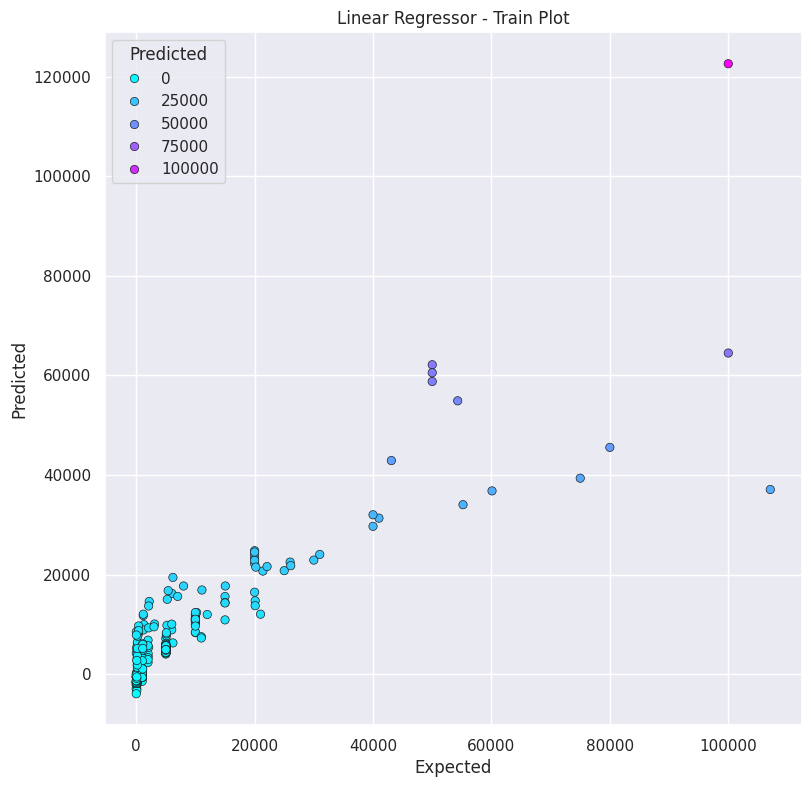

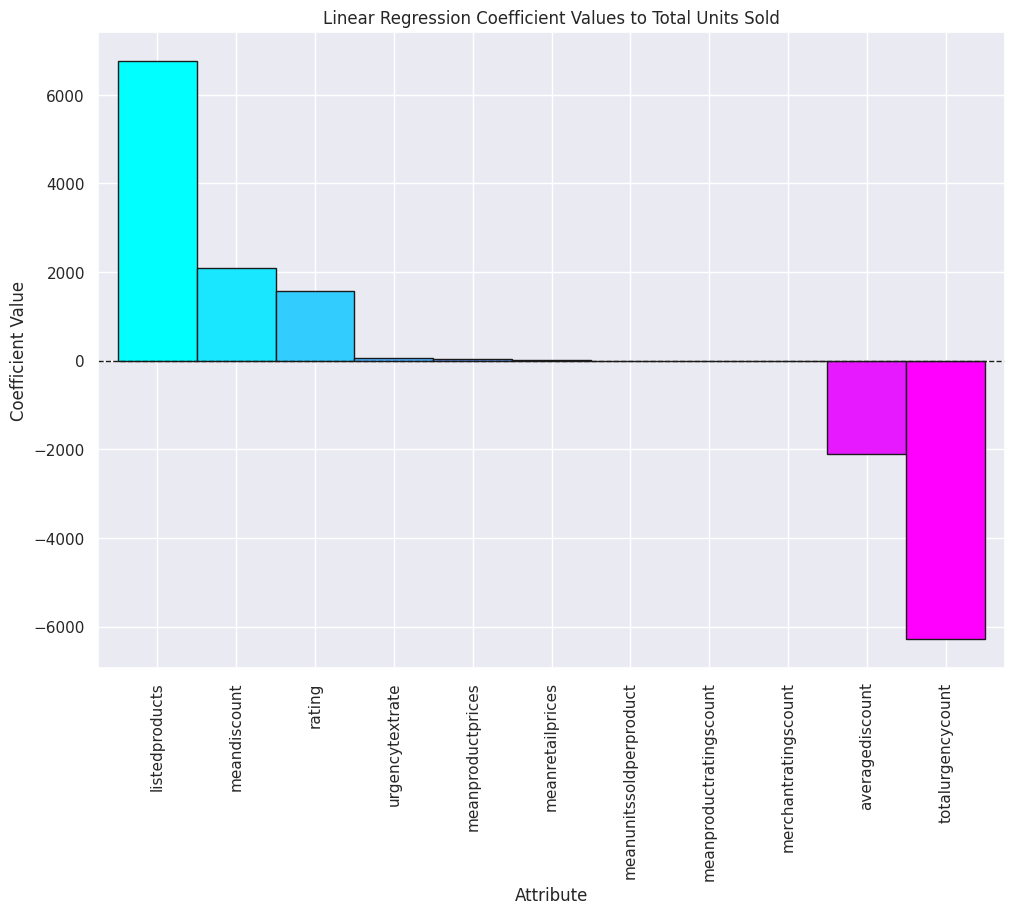

In [ ]:
#Linear Regression
X = success_df.iloc[:,:-1].values
y = success_df['totalunitssold'].values

#split-train and standardization
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)
sc_x = StandardScaler()
sc_x.fit(X)
X_std = sc_x.transform(X)

#start time - lr fit
st = time.time()

lr= LinearRegression()
lr.fit(X_train, y_train)

et = time.time()

# get the execution time
elapsed_time = et - st

#Predict
y_train_pred= lr.predict(X_train)
y_test_pred= lr.predict(X_test)

#print metrics
print('Fitting time: %.2f'% elapsed_time, 'seconds')
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print('MSE train: %.3f, test:%.3f' % (error_train, error_test))

r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print('R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))

#Testing the model
predicted = lr.predict(X_test)
expected = y_test

#Training Plot (expected vs predicted)
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', edgecolor='k', legend=True).set(title='Linear Regressor - Train Plot')


print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')
print('        ')

#print coefficients
print('Coefficients: ')
cdf = pd.DataFrame(zip(success_df.columns, lr.coef_), columns=['Attribute', 'Coefficient'])
print(cdf)

#PLOTTING REGRESSION COEFFICIENT BAR PLOT

#reorder from largest to smallest
coeff = cdf.sort_values(by='Coefficient', ascending=False)
coeff = coeff.set_index('Attribute')

# Get the number of bars to plot
num_bars = coeff['Coefficient'].shape[0]

# Generate a list of colors from the 'rainbow' colormap
cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, num_bars))

ax = coeff.plot.bar(y='Coefficient', rot=0, legend=False, color=colors, edgecolor = 'k', width = 1)

# Set labels and title (optional)
plt.rcParams["figure.figsize"] = (10, 5)
ax.set_xlabel('Attribute')
ax.set_ylabel('Coefficient Value')
ax.set_title('Linear Regression Coefficient Values to Total Units Sold')
plt.xticks( rotation=90)
plt.axhline(y=0, linewidth=1, color='k', linestyle='dashed')

# Show the plot
plt.show()

Fitting time: 0.42 seconds
MSE train: 7075697.592, test:36126721.495
R^2 train: 0.964, test:0.846
The R2 score: 0.8458822694160553

The MSE: 36126721.49463893
Feature Importance: 
                 Attribute  Feature Importance
0           listedproducts            0.200331
1                   rating            0.023183
2     merchantratingscount            0.058443
3        meanproductprices            0.011912
4         meanretailprices            0.015035
5          averagediscount            0.010815
6             meandiscount            0.009523
7  meanproductratingscount            0.655319
8        totalurgencycount            0.009080
9          urgencytextrate            0.006359


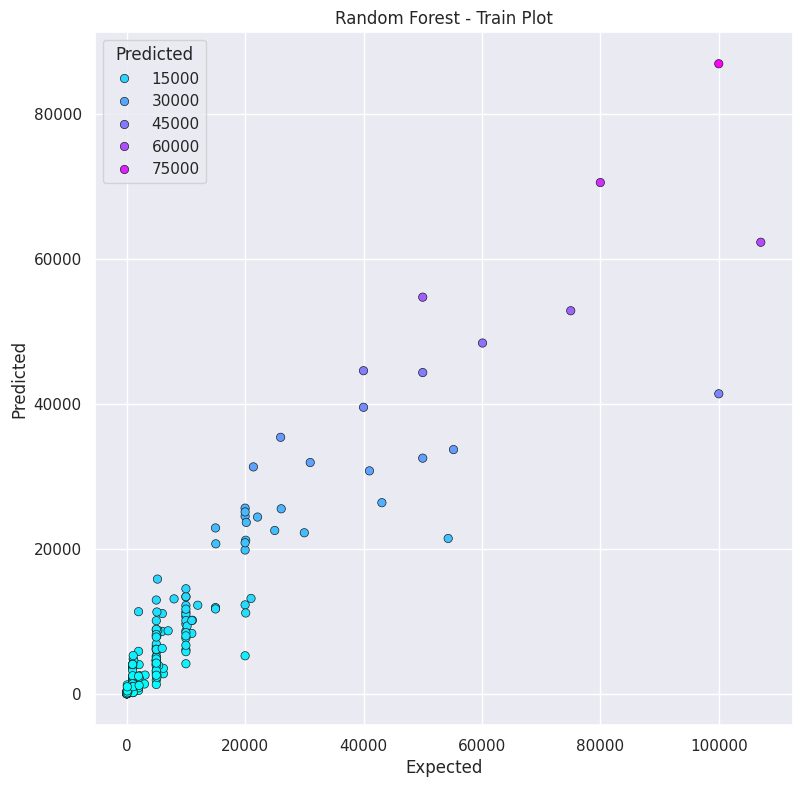

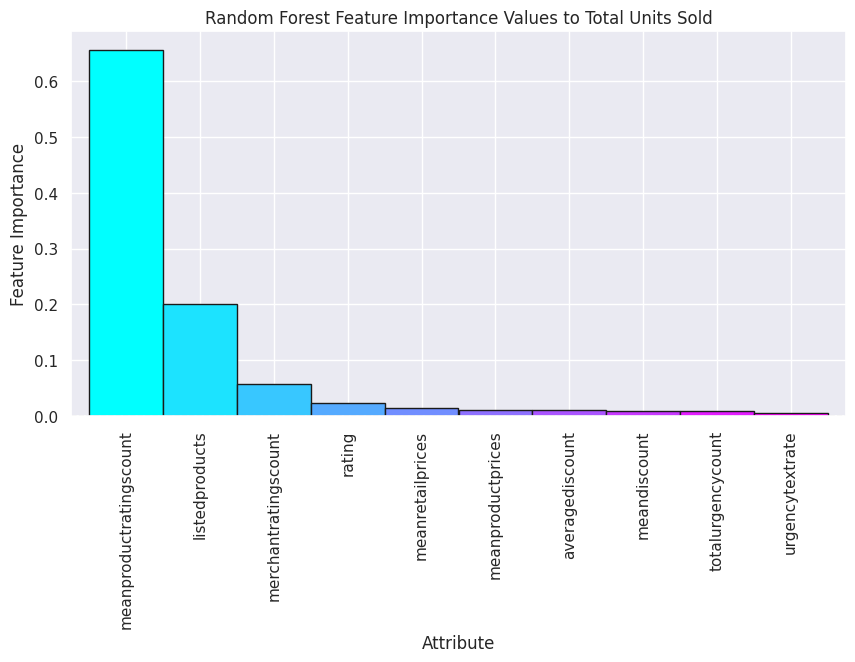

In [ ]:
#Nonliner - Random Forest Regressor - max_dpeth = 10
success_df = success_df.drop(success_df.columns[[1]], axis=1)
X = success_df.iloc[:,:-1].values
y = success_df['totalunitssold'].values

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=0)
sc_x = StandardScaler()
sc_x.fit(X)
X_std = sc_x.transform(X)

y= y.reshape(-1,1)
sc_y = StandardScaler()
sc_y.fit(y)
y_std = sc_y.transform(y).flatten()

#start time - Random Forest fit
st = time.time()

forest = RandomForestRegressor(max_depth=10, random_state=0)
forest.fit(X_train, y_train)

et = time.time()

# get the execution time
elapsed_time = et - st


#testing the model
y_train_pred= forest.predict(X_train)
y_test_pred= forest.predict(X_test)

#print metrics
print('Fitting time: %.2f'% elapsed_time, 'seconds')
error_train = mean_squared_error(y_train, y_train_pred)
error_test = mean_squared_error(y_test, y_test_pred)
print('MSE train: %.3f, test:%.3f' % (error_train, error_test))

r2_train = r2_score (y_train, y_train_pred )
r2_test = r2_score (y_test, y_test_pred )
print('R^2 train: %.3f, test:%.3f' % (r2_train, r2_test))

#Testing the model
predicted = forest.predict(X_test)
expected = y_test

#Training Plot (expected vs predicted)
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

figure = plt.figure(figsize=(9, 9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
                       hue='Predicted', palette='cool', edgecolor='k', legend=True).set(title='Random Forest - Train Plot')


print(f'The R2 score: {metrics.r2_score(expected, predicted)}\n')
print(f'The MSE: {metrics.mean_squared_error(expected, predicted)}')

#print coefficients
print('Feature Importance: ')
cdf = pd.DataFrame(zip(success_df.columns, forest.feature_importances_), columns=['Attribute', 'Feature Importance'])
print(cdf)

#PLOTTING REGRESSION FEATURE IMPORTANCE BAR PLOT

#reorder from largest to smallest
feature_imp = cdf.sort_values(by='Feature Importance', ascending=False)
feature_imp = feature_imp.set_index('Attribute')

# Get the number of bars to plot
num_bars = feature_imp['Feature Importance'].shape[0]

# Generate a list of colors from the 'rainbow' colormap
cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, num_bars))

ax = feature_imp.plot.bar(y='Feature Importance', rot=0, legend=False, color=colors, edgecolor = 'k', width = 1)

# Set labels and title (optional)
plt.rcParams["figure.figsize"] = (10, 5)
ax.set_xlabel('Attribute')
ax.set_ylabel('Feature Importance')
ax.set_title('Random Forest Feature Importance Values to Total Units Sold')
plt.xticks( rotation=90)
plt.axhline(y=0, linewidth=1, color='k', linestyle='dashed')

# Show the plot
plt.show()

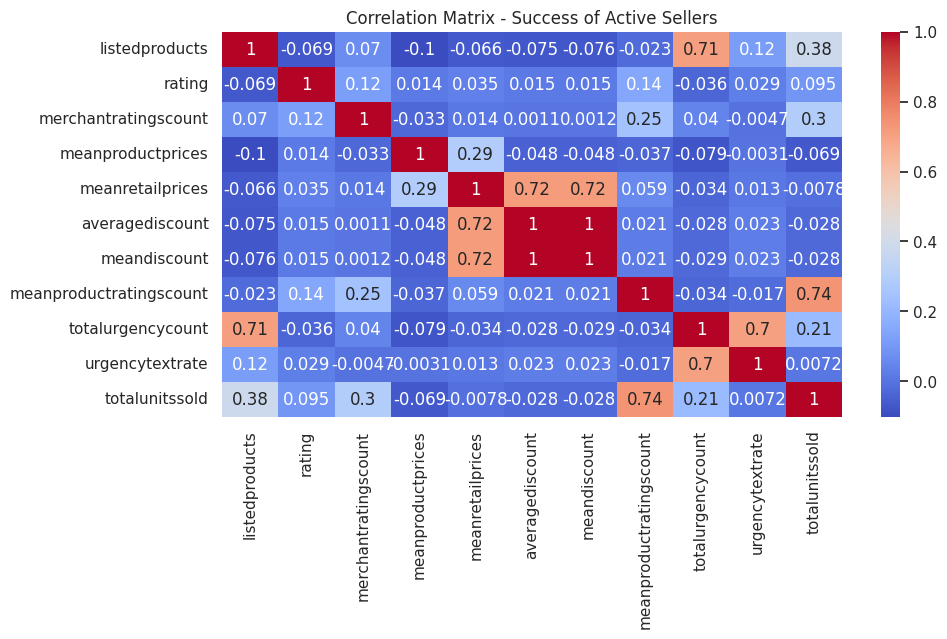

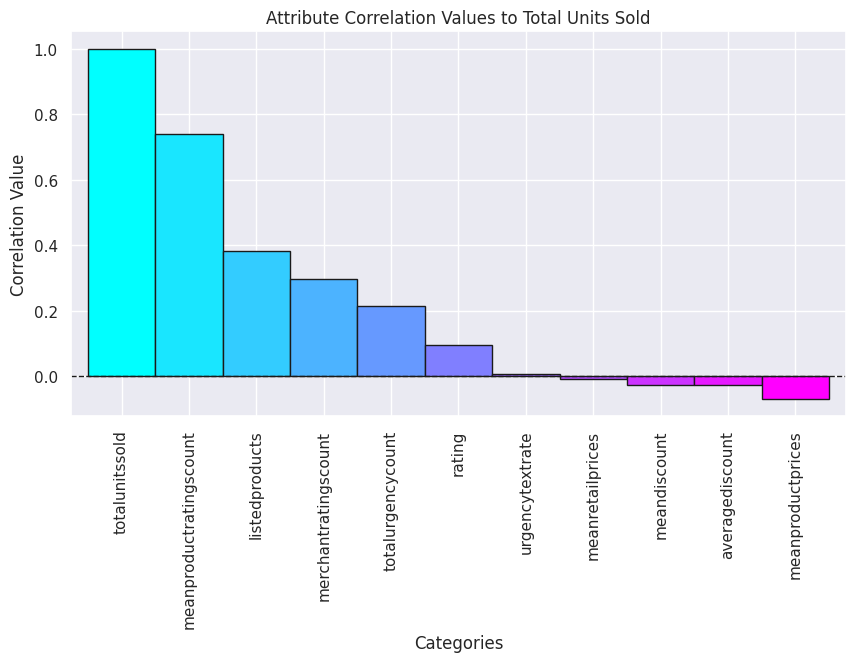

In [ ]:
#PLOTTING CORRELATION MATRIX AND BAR PLOT FOR TARGET VALUE
#Correlation Matrix
dataplot = sns.heatmap(success_df.corr(), cmap="coolwarm", annot=True)

# displaying heatmap
plt.title('Correlation Matrix - Success of Active Sellers')
plt.show()

#create correlation matrix
success_corr_matrix = success_df.corr()
#extract corr values related to total units sold
success_corr_totalunitssold = pd.DataFrame(success_corr_matrix['totalunitssold'])
#reorder from largest to smallest
success_corr_totalunitssold = success_corr_totalunitssold.sort_values(by='totalunitssold', ascending=False)

# Get the number of bars to plot
num_bars = success_corr_totalunitssold['totalunitssold'].shape[0]

# Generate a list of colors from the 'rainbow' colormap
cmap = plt.get_cmap('cool')
colors = cmap(np.linspace(0, 1, num_bars))

ax = success_corr_totalunitssold.plot.bar(y='totalunitssold', rot=0, legend=False, color=colors, edgecolor = 'k', width = 1)

# Set labels and title (optional)
plt.rcParams["figure.figsize"] = (10, 5)
ax.set_xlabel('Categories')
ax.set_ylabel('Correlation Value')
ax.set_title('Attribute Correlation Values to Total Units Sold')
plt.xticks(rotation=90)
plt.axhline(y=0, linewidth=1, color='k', linestyle='dashed')

# Show the plot
plt.show()

Products Rating and Performance Data

In [ ]:
#Version of sklearn: 1.2.2
#Versionn of pandas: 1.5.3

# from google.colab import drive
# drive.mount('/content/drive')

#Links to datasets
#Dataset Sources
#Online Shoppers Purchasing Intention Data Set
#https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
#Sales of Summer Clothes in E-commerce Wish
#https://www.kaggle.com/datasets/jmmvutu/summer-products-and-sales-in-ecommerce-wish/data?select=summer-products-with-rating-and-performance_2020-08.csv



Mounted at /content/drive


In [ ]:
def online_shopping():
  #import 'Online Shoppers Intention' dataset
  # online_shoppers_intention_df = pd.read_csv("/content/drive/MyDrive/CS519-Group Project/online_shoppers_intention.csv")
  online_shoppers_intention_df = pd.read_csv("online_shoppers_intention.csv")

  #Plot distributions of numerical variables
  numerical_vars = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration',
                    'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
  online_shoppers_intention_df[numerical_vars].hist(bins=20, figsize=(15, 10))
  plt.suptitle('Distributions of Numerical Variables for Online Shopping Dataset')
  plt.show()

  # Plot count of categorical variables
  categorical_vars = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']
  fig, axes = plt.subplots(3, 3, figsize=(15, 10))
  axes = axes.ravel()
  for i, var in enumerate(categorical_vars):
      sns.countplot(x=var, data=online_shoppers_intention_df, ax=axes[i])
      axes[i].set_title(f'Count of {var}')
  plt.tight_layout()
  plt.show()

  # #show heading of 'Online Shoppers Intention' df
  # online_shoppers_intention_df.head()

  # #print count of each class 'REVENUE' in the dataset
  # print(online_shoppers_intention_df['Revenue'].value_counts())

  #TOTAL COUNT OF TRUE vs FALSE TRANSACTIONS OVER THE CALENDAR YEAR
  #group data by month and class
  month_count = online_shoppers_intention_df[['Month', 'Revenue']].copy()

  #filter true transactions
  month_count_true = month_count[(month_count['Revenue'] == True)]

  month_rev_true = (month_count_true['Month'].value_counts())
  month_rev_true = month_rev_true.reindex([ "Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
  month_rev_true.columns =['Month', 'True Count']

  #filter false transactions
  month_count_false = month_count[(month_count['Revenue'] == False)]

  month_rev_false = (month_count_false['Month'].value_counts())
  month_rev_false.columns = ['Month', 'False Count']
  month_rev_false = month_rev_false.reindex([ "Feb", "Mar", "May", "June", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])

  #plot total number of true or false transactions over the calendar year
  month_rev_true.plot.line()
  month_rev_false.plot.line()
  plt.title('Sessions Over the Calendar Year')
  plt.ylabel('Number of Sessions')
  plt.xlabel('Month')
  plt.legend(['Positive', 'Negative'])
  plt.show()

  # Conversion Rate Analysis
  conversion_rates = online_shoppers_intention_df.groupby('VisitorType')['Revenue'].mean()
  print("Conversion Rates by Visitor Type:")
  print(conversion_rates)

  # Time Series Analysis
  monthly_revenue = online_shoppers_intention_df.groupby('Month')['Revenue'].mean()
  monthly_revenue.plot(kind='line', marker='o')
  plt.title('Monthly Revenue Trend for Online Shopping Dataset')
  plt.xlabel('Month')
  plt.ylabel('Mean Revenue')
  plt.grid(True)
  plt.show()

  # Calculate counts for each stage
  administrative_count = online_shoppers_intention_df['Administrative'].sum()
  informational_count = online_shoppers_intention_df['Informational'].sum()
  product_related_count = online_shoppers_intention_df['ProductRelated'].sum()

  # Plot funnel visualization
  plt.figure(figsize=(8, 4))
  plt.barh(['Administrative', 'Informational', 'Product Related'],
          [administrative_count, informational_count, product_related_count],
          color=['skyblue', 'salmon', 'lightgreen'])
  plt.xlabel('Number of Visitors')
  plt.title('Visitor Behavior Funnel for Online Shopping Dataset')
  plt.show()


  # Geographical Analysis
  revenue_by_region = online_shoppers_intention_df.groupby('Region')['Revenue'].sum()
  exit_rate_by_region = online_shoppers_intention_df.groupby('Region')['ExitRates'].sum()

  # Visualization
  plt.figure(figsize=(14, 10))

  # Browser Revenue
  plt.subplot(2, 2, 1)
  revenue_by_region.plot(kind='bar', color='skyblue')
  plt.xlabel('Region')
  plt.ylabel('Total Revenue')
  plt.title('Total Revenue by Region for Online Shopping Dataset')
  plt.xticks(rotation=45)

  # Browser Exit Rate
  plt.subplot(2, 2, 2)
  exit_rate_by_region.plot(kind='bar', color='salmon')
  plt.title('Total Exit by Region for Online Shopping Dataset')
  plt.xlabel('Region')
  plt.ylabel('Total Exit Rate')
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

  #Browser Analysis
  browser_revenue = online_shoppers_intention_df.groupby('Browser')['Revenue'].mean()
  browser_exit_rate = online_shoppers_intention_df.groupby('Browser')['ExitRates'].mean()

  # Visualization
  plt.figure(figsize=(14, 10))

  # Browser Revenue
  plt.subplot(2, 2, 1)
  browser_revenue.plot(kind='bar', color='skyblue')
  plt.title('Mean Revenue by Browser for Online Shopping Dataset')
  plt.xlabel('Browser')
  plt.ylabel('Mean Revenue')
  plt.xticks(rotation=45)

  # Browser Exit Rate
  plt.subplot(2, 2, 2)
  browser_exit_rate.plot(kind='bar', color='salmon')
  plt.title('Mean Exit Rate by Browser for Online Shopping Dataset')
  plt.xlabel('Browser')
  plt.ylabel('Mean Exit Rate')
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

  # Operating System Analysis
  os_revenue = online_shoppers_intention_df.groupby('OperatingSystems')['Revenue'].mean()
  os_exit_rate = online_shoppers_intention_df.groupby('OperatingSystems')['ExitRates'].mean()

  # Visualization
  plt.figure(figsize=(14, 10))

  # OS Revenue
  plt.subplot(2, 2, 1)
  os_revenue.plot(kind='bar', color='skyblue')
  plt.title('Mean Revenue by Operating System for Online Shopping Dataset')
  plt.xlabel('Operating System')
  plt.ylabel('Mean Revenue')

  # OS Exit Rate
  plt.subplot(2, 2, 2)
  os_exit_rate.plot(kind='bar', color='salmon')
  plt.title('Mean Exit Rate by Operating System for Online Shopping Dataset')
  plt.xlabel('Operating System')
  plt.ylabel('Mean Exit Rate')

  plt.tight_layout()
  plt.show()


  create classification dataset (dropped some category data (strings), for quick analysis)
  online_shoppers_intention_df = online_shoppers_intention_df.drop("Month", 1)
  online_shoppers_intention_df = online_shoppers_intention_df.drop("VisitorType", 1)
  online_shoppers_intention_df = online_shoppers_intention_df.drop("Weekend", 1)
  X = online_shoppers_intention_df.drop("Revenue", 1)   #Feature Matrix
  y = online_shoppers_intention_df["Revenue"]          #Target Variable

  online_shoppers_intention_df = online_shoppers_intention_df.drop(["Month", "VisitorType","Weekend"], axis=1)
  X = online_shoppers_intention_df.drop("Revenue", axis=1)   #Feature Matrix
  y = online_shoppers_intention_df["Revenue"]          #Target Variable


  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

  #classifcation test - Perceptron


  #scale data
  sc = StandardScaler()
  sc.fit(X_train)
  X_train_std = sc.transform(X_train)
  X_test_std = sc.transform(X_test)

  # st = time.time()
  # #run model
  ppn = Perceptron(max_iter=40,eta0=0.1, random_state=1)
  ppn.fit(X_train_std, y_train)

  # #calculate test accuracy
  y_pred = ppn.predict(X_test_std)

  # #calculate training accuracy
  y_train_pred = ppn.predict(X_train)
  print("Perceptron Train Accuracy for Revenue: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  print('Perceptron Test Accuracy for Revenue: %.2f' % accuracy_score(y_test, y_pred))
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')
  print('-'*20)
  st = time.time()
  bag = BaggingClassifier(ppn,
                          n_estimators=100,
                          random_state=1)
  bag.fit(X_train_std, y_train)
  y_train_pred = bag.predict(X_train)
  print("Perceptron Train Accuracy for Revenue Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  y_pred = bag.predict(X_test_std)
  print('Perceptron Test Accuracy for Revenue Using Bagging: %.2f' % accuracy_score(y_test, y_pred))
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')

  #cross-fold score
  accuracy = cross_val_score(ppn, X, y, scoring='accuracy', cv = 10)
  print("CrossVal Mean for Revenue:",accuracy.mean())

  # # #calculate train accuracty
  # # # compute the confusion matrix
  cm = confusion_matrix(y_test,y_pred)

  # #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g')
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Perceptron Confusion Matrix-Perceptron for Revenue',fontsize=17)
  plt.show()

  #classification test - Kernel SVM

  st = time.time()
  # #run model
  svm = SVC(kernel='rbf', C=1.0, random_state=1, gamma=0.10)
  svm.fit(X_train_std, y_train)

  #calculate test accuracy
  y_pred = svm.predict(X_test_std)
  # #calculate training accuracy
  y_train_pred = svm.predict(X_train)
  print("Non-Linear SVM (RBF Kernel) Train Accuracy for Revenue: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  print('Non-Linear SVM (RBF Kernel) Test Accuracy for Revenue: %.2f' % accuracy_score(y_test, y_pred))
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')
  print('-'*20)
  st = time.time()
  bag = BaggingClassifier(svm,
                          n_estimators=10,
                          random_state=1)
  bag.fit(X_train_std, y_train)
  y_train_pred = bag.predict(X_train)
  print("Non-Linear SVM (RBF Kernel) Train Accuracy for Revenue Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  y_pred = bag.predict(X_test_std)
  print('Non-Linear SVM (RBF Kernel) Test Accuracy for Revenue Using Bagging: %.2f' % accuracy_score(y_test, y_pred))
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')

  # # #cross-fold score
  accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv = 5)
  print("CrossVal Mean for Revenue:",accuracy.mean())

  # # # compute the confusion matrix
  cm = confusion_matrix(y_test,y_pred)

  # # #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g')
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('Non-Linear SVM (RBF Kernel) Confusion Matrix-NonLinear(RBF) for Revenue',fontsize=17)
  plt.show()

  #classification test - Kneghbor
  st = time.time()
  #run model
  knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
  knn.fit(X_train_std, y_train)
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')
  #calculate test accuracy
  y_pred = knn.predict(X_test_std)
  #calculate training accuracy
  y_train_pred = knn.predict(X_train)
  print("K Nearest Neighbor Train Accuracy for Revenue: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  print('K Nearest Neighbor Test Accuracy for Revenue: %.2f' % accuracy_score(y_test, y_pred))
  print('-'*20)
  st = time.time()
  bag = BaggingClassifier(knn,
                          n_estimators=10,
                          random_state=1)
  bag.fit(X_train_std, y_train)
  y_train_pred = bag.predict(X_train)
  print("K Nearest Neighbor Train Accuracy for Revenue Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
  y_pred = bag.predict(X_test_std)
  print('K Nearest Neighbor Test Accuracy for Revenue Using Bagging: %.2f' % accuracy_score(y_test, y_pred))
  et = time.time()
  # get the execution time
  elapsed_time = et - st
  print('Execution time: %.2f'% elapsed_time, 'seconds')
  # #cross-fold score
  accuracy = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)
  print("CrossVal Mean for Revenue:",accuracy.mean())




  # # compute the confusion matrix
  cm = confusion_matrix(y_test, y_pred)

  #Plot the confusion matrix.
  sns.heatmap(cm,
              annot=True,
              fmt='g')
  plt.ylabel('Prediction',fontsize=13)
  plt.xlabel('Actual',fontsize=13)
  plt.title('K Nearest Neighbor Confusion Matrix-KNN for Revenue',fontsize=17)
  plt.show()


In [ ]:
def summer_wish():
  #Import 'Sales of Summer Clothes in E-commerce Wish' dataset
  # df_summer_ratings = pd.read_csv('/content/drive/MyDrive/CS519-Group Project/summer_products/summer-products-with-rating-and-performance_2020-08.csv')
  df_summer_ratings = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')

  numerical_vars = ['price', 'retail_price', 'rating', 'rating_count', 'merchant_rating_count', 'product_variation_inventory', 'merchant_rating']

  df_summer_ratings[numerical_vars].hist(bins=20, figsize=(15, 10))
  plt.suptitle('Distributions of Numerical Variables for Summer Products Rating and Performance Data')
  plt.show

  test = []
  test_label = []
  for index, row in df_summer_ratings.loc[:, ['units_sold']].iterrows():
      if row['units_sold'] < 100:
        # print('Bottom Tier: ' +  str(row['units_sold']))
        test.append(row['units_sold'])
        test_label.append('Bottom Tier')
      elif 5000 > row['units_sold'] > 100:
        # print('Mid Tier: ' +  str(row['units_sold']))
        test.append(row['units_sold'])
        test_label.append('Mid Tier')
      elif row['units_sold'] > 5000:
        # print('Top Tier: ' +  str(row['units_sold']))
        test.append(row['units_sold'])
        test_label.append('Top Tier')

  data_test = {'Units_Sold': test, 'Class': test_label}


  df_data_test = pd.DataFrame(data_test)
  df_unique = df_data_test['Class'].unique()


  for uniqueval in df_unique:
      y = df_data_test.Class.values
      y = np.where(y == uniqueval, -1, 1)
      X = df_data_test.Units_Sold.values
      X = X.reshape(-1, 1)

      X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
      sc = StandardScaler()
      sc.fit(X_train)
      X_train_std = sc.transform(X_train)
      X_test_std = sc.transform(X_test)

      st = time.time()
      print(f'Perceptron Test for {uniqueval}')
      ppn = Perceptron(max_iter=40,eta0=0.1, random_state=1)
      ppn.fit(X_train_std, y_train)
      et = time.time()

      elapsed_time = et - st
      print('Execution time: %.2f'% elapsed_time, 'seconds')
      #calculate test accuracy
      y_pred = ppn.predict(X_test_std)
      print('Perceptron Test Accuracy: %.2f' % accuracy_score(y_test, y_pred))

      #calculate training accuracy
      y_train_pred = ppn.predict(X_train)
      print("Perceptron Train Accuracy: %.2f" % metrics.accuracy_score(y_train, y_train_pred))

      bag = BaggingClassifier(ppn,
                          n_estimators=100,
                          random_state=1)
      bag.fit(X_train_std, y_train)
      y_train_pred = bag.predict(X_train)
      print(f"Perceptron Train Accuracy for {uniqueval} Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
      y_pred = bag.predict(X_test_std)
      print(f'Perceptron Test Accuracy for {uniqueval} Using Bagging: %.2f' % accuracy_score(y_test, y_pred))

      #cross-fold score
      accuracy = cross_val_score(ppn, X, y, scoring='accuracy', cv = 10)
      print(f"CrossVal Mean for {uniqueval}:",round(accuracy.mean(),2))
      #calculate train accuracty
      # compute the confusion matrix
      cm = confusion_matrix(y_test,y_pred)

      #Plot the confusion matrix.
      sns.heatmap(cm,
                  annot=True,
                  fmt='g')
      plt.ylabel('Prediction',fontsize=13)
      plt.xlabel('Actual',fontsize=13)
      plt.title(f'Confusion Matrix-Perceptron {uniqueval}',fontsize=17)
      plt.show()

      #classification test - Kernel SVM
      print('*'*20)
      print(f'Kernel SVM Test for {uniqueval}')
      st = time.time()
      #run model
      svm = SVC(kernel='rbf', C=1.0, random_state=1, gamma=0.10)
      svm.fit(X_train, y_train)

      et = time.time()

      # get the execution time
      elapsed_time = et - st
      print('Execution time: %.2f'% elapsed_time, 'seconds')

      #calculate test accuracy
      y_pred = svm.predict(X_test)
      print(f'Non-Linear SVM (RBF Kernel) Test Accuracy for {uniqueval}: %.2f' % accuracy_score(y_test, y_pred))

      #calculate training accuracy
      y_train_pred = svm.predict(X_train)
      print(f"Non-Linear SVM (RBF Kernel) Train Accuracy for {uniqueval}: %.2f" % metrics.accuracy_score(y_train, y_train_pred))

      bag = BaggingClassifier(svm,
                          n_estimators=10,
                          random_state=1)
      bag.fit(X_train_std, y_train)
      y_train_pred = bag.predict(X_train)
      print(f"Non-Linear SVM (RBF Kernel) Train Accuracy for {uniqueval} Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
      y_pred = bag.predict(X_test_std)
      print(f'Non-Linear SVM (RBF Kernel) Test Accuracy for {uniqueval} Using Bagging: %.2f' % accuracy_score(y_test, y_pred))

      #cross-fold score
      accuracy = cross_val_score(svm, X, y, scoring='accuracy', cv = 5)
      print(f"CrossVal Mean for {uniqueval}:",accuracy.mean())

      # compute the confusion matrix
      cm = confusion_matrix(y_test,y_pred)

      #Plot the confusion matrix.
      sns.heatmap(cm,
                  annot=True,
                  fmt='g')
      plt.ylabel('Prediction',fontsize=13)
      plt.xlabel('Actual',fontsize=13)
      plt.title(f'Confusion Matrix-NonLinear(RBF) for {uniqueval}',fontsize=17)
      plt.show()

      # #     #classification test - KNN
      print('*'*20)
      print(f'KNN Test for {uniqueval}')
      st = time.time()
      #run model
      knn = KNeighborsClassifier(n_neighbors=10, p=2, metric='minkowski')
      knn.fit(X_train, y_train)

      et = time.time()

      # get the execution time
      elapsed_time = et - st
      print('Execution time: %.2f'% elapsed_time, 'seconds')

      #calculate test accuracy
      y_pred = knn.predict(X_test)
      print(f'K Nearest Neighbor Test Accuracy for {uniqueval}: %.2f' % accuracy_score(y_test, y_pred))
      #calculate training accuracy
      y_train_pred = knn.predict(X_train)
      print(f"K Nearest Neighbor Train Accuracy for {uniqueval}: %.2f" % metrics.accuracy_score(y_train, y_train_pred))

      bag = BaggingClassifier(knn,
                          n_estimators=10,
                          random_state=1)
      bag.fit(X_train_std, y_train)
      y_train_pred = bag.predict(X_train)
      print(f"K Nearest Neighbor Train Accuracy for {uniqueval} Using Bagging: %.2f" % metrics.accuracy_score(y_train, y_train_pred))
      y_pred = bag.predict(X_test_std)
      print(f'K Nearest Neighbor Test Accuracy for {uniqueval} Using Bagging: %.2f' % accuracy_score(y_test, y_pred))

      #cross-fold score
      accuracy = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)
      print(f"CrossVal Mean for {uniqueval}:",accuracy.mean())

      # compute the confusion matrix
      cm = confusion_matrix(y_test, y_pred)

      #Plot the confusion matrix.
      sns.heatmap(cm,
                  annot=True,
                  fmt='g')
      plt.ylabel('Prediction',fontsize=13)
      plt.xlabel('Actual',fontsize=13)
      plt.title(f'Confusion Matrix-KNN {uniqueval}',fontsize=17)
      plt.show()

      print('-'*20)

In [ ]:
def main():
  online_shopping()
  summer_wish()

Perceptron Test for Top Tier
Execution time: 0.00 seconds
Perceptron Test Accuracy: 1.00
Perceptron Train Accuracy: 0.36
Perceptron Train Accuracy for Top Tier Using Bagging: 0.36
Perceptron Test Accuracy for Top Tier Using Bagging: 1.00
********************
Kernel SVM Test for Top Tier
Execution time: 0.01 seconds
Non-Linear SVM (RBF Kernel) Test Accuracy for Top Tier: 1.00
Non-Linear SVM (RBF Kernel) Train Accuracy for Top Tier: 1.00
Non-Linear SVM (RBF Kernel) Train Accuracy for Top Tier Using Bagging: 0.36
Non-Linear SVM (RBF Kernel) Test Accuracy for Top Tier Using Bagging: 1.00
********************
KNN Test for Top Tier
Execution time: 0.00 seconds
K Nearest Neighbor Test Accuracy for Top Tier: 1.00
K Nearest Neighbor Train Accuracy for Top Tier: 1.00
K Nearest Neighbor Train Accuracy for Top Tier Using Bagging: 0.36
K Nearest Neighbor Test Accuracy for Top Tier Using Bagging: 1.00
Perceptron Test for Bottom Tier
Execution time: 0.00 seconds
Perceptron Test Accuracy: 1.00
Percept

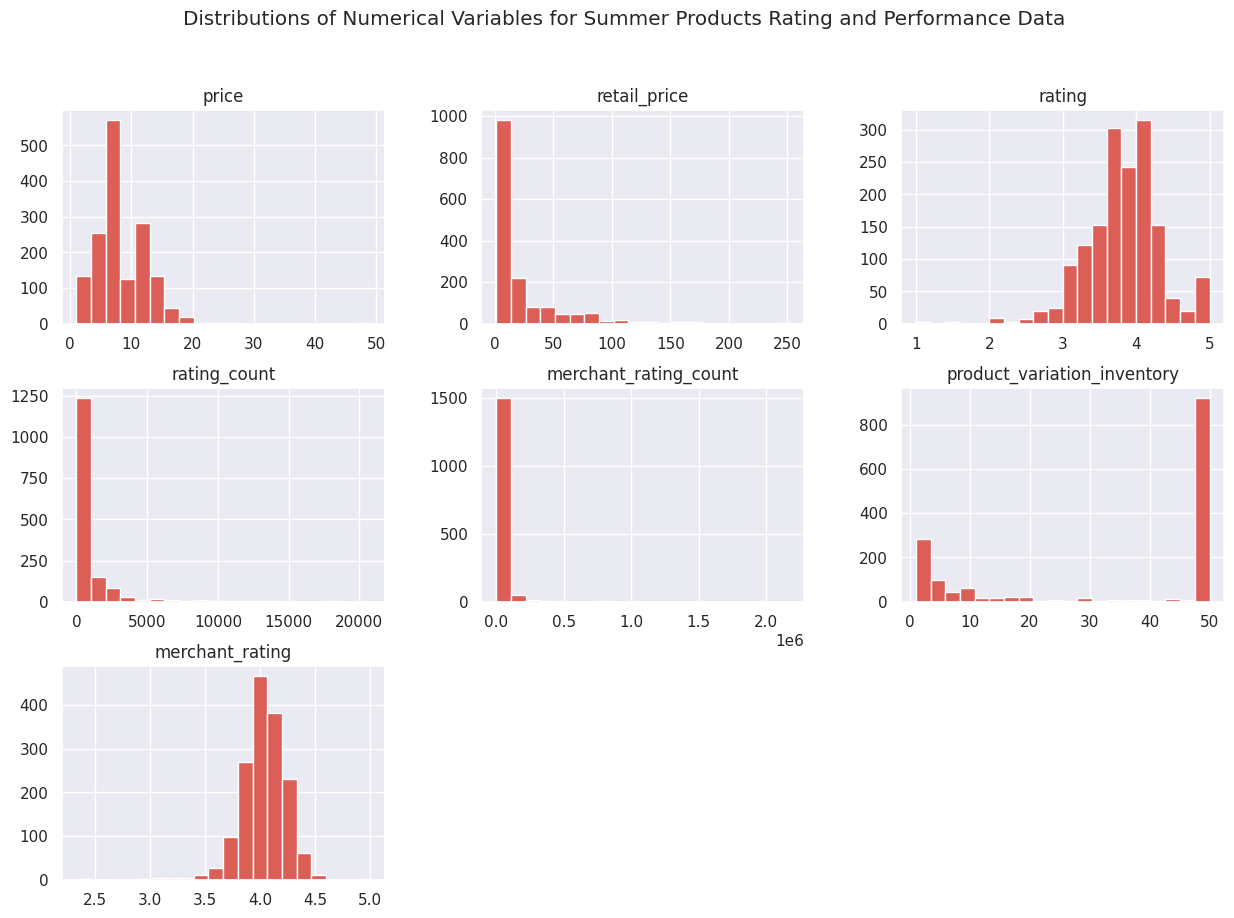

In [ ]:
if __name__ == "__main__":
    main()